In [63]:
import os
from utils import *
import optuna

In [64]:
data, usermap, itemmap, users = load_data2()
data_train, data_val=split_data2(data, 0.2)

In [65]:
rat_rank_study = optuna.create_study(
    study_name="rating+ranking",
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 16:16:50,636] A new study created in memory with name: rating+ranking


In [66]:
slim_bpr_study = optuna.create_study(
    study_name="slim_bpr",
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 16:16:50,667] A new study created in memory with name: slim_bpr


In [67]:
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython

slim_bpr_recommender = SLIM_BPR_Cython(data_train, verbose=False)
slim_bpr_recommender.fit(epochs=411, 
                symmetric=True, 
                lambda_i=0.3776970357741607, 
                lambda_j=0.04722986062962217, 
                learning_rate=0.0003013846889808713, 
                topK=60, 
                sgd_mode="adagrad", 
                gamma=1.1938389128360214e-05, 
                beta_1=0.002818160651487956, 
                beta_2=3.307005474510783e-07)

#slimbpr [epochs: 411, symmetric: True, lambda_i: 0.3776970357741607, lambda_j: 0.04722986062962217, learning_rate: 0.0003013846889808713, topK: 60, sgd_mode: adagrad, gamma: 1.1938389128360214e-05, beta_1: 0.002818160651487956, beta_2: 3.307005474510783e-07]

Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Epoch 1 of 411. Elapsed time 0.06 sec
SLIM_BPR_Recommender: Epoch 2 of 411. Elapsed time 0.12 sec
SLIM_BPR_Recommender: Epoch 3 of 411. Elapsed time 0.24 sec
SLIM_BPR_Recommender: Epoch 4 of 411. Elapsed time 0.36 sec
SLIM_BPR_Recommender: Epoch 5 of 411. Elapsed time 0.42 sec
SLIM_BPR_Recommender: Epoch 6 of 411. Elapsed time 0.47 sec
SLIM_BPR_Recommender: Epoch 7 of 411. Elapsed time 0.53 sec
SLIM_BPR_Recommender: Epoch 8 of 411. Elapsed time 0.59 sec
SLIM_BPR_Recommender: Epoch 9 of 411. Elapsed time 0.65 sec
SLIM_BPR_Recommender: Epoch 10 of 411. Elapsed time 0.71 sec
SLIM_BPR_Recommender: Epoch 11 of 411. Elapsed time 0.76 sec
SLIM_BPR_Recommender: Epoch 12 of 411. Elapsed time 0.81 sec
SLIM_BPR_Recommender: Epoch 13 of 411. Elapsed time 0.88 sec
SLIM_BPR_Recommender: Epoch 14 of 411. Elapsed time 0.93 sec
SLIM_BPR_Recommender: Epoch 15 of 411. Elapsed time 0.99 sec
SLIM_BPR_Recommender: Epoch 16 of 411. E

In [68]:
rp3beta_study = optuna.create_study(
    study_name="P3Beta",
    storage=get_database_url(),
    load_if_exists=True,
    direction="maximize",
)

[I 2024-01-06 16:17:37,221] A new study created in memory with name: P3Beta


In [69]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_recommender = RP3betaRecommender(data_train, verbose=False)
rp3beta_recommender.fit(topK=35, alpha=0.3598110596257423, beta=0.1558338653772352, implicit=True, normalize_similarity=True)

#p3beta [topK: 35, alpha: 0.3598110596257423, beta: 0.1558338653772352, implicit: True, normalize_similarity: True]

In [70]:
#slim_el_study = optuna.create_study(
#    study_name="slim_el",
#    storage=get_database_url(),
#    load_if_exists=True,
#    direction="maximize",
#)

In [71]:
#from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
#
#slim_el_recommender = MultiThreadSLIM_SLIMElasticNetRecommender(data_train, verbose=False)
#slim_el_recommender.fit(alpha=0.003495947934879827, 
#                        topK=531, 
#                        l1_ratio=0.0030148508221821105)
#
#[alpha: 0.003495947934879827, topK: 531, l1_ratio: 0.0030148508221821105]

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
user_id=50

In [ ]:
slim_bpr_score = slim_bpr_recommender._compute_item_score(user_id).flatten()
slim_bpr_score

array([0.        , 0.00697347, 0.00404874, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
rp3beta_score = rp3beta_recommender._compute_item_score(user_id).flatten()
rp3beta_score

array([0.        , 0.07014223, 0.        , ..., 0.        , 0.        ,
       0.        ])

C:\Users\Francesco1\AppData\Local\Temp\ipykernel_2136\1317543415.py:15: RuntimeWarning: divide by zero encountered in divide
  lminusinf_slim_bpr_scores = slim_bpr_score / lminusinf_slim_bpr
C:\Users\Francesco1\AppData\Local\Temp\ipykernel_2136\1317543415.py:15: RuntimeWarning: invalid value encountered in divide
  lminusinf_slim_bpr_scores = slim_bpr_score / lminusinf_slim_bpr


[0.         0.00697347 0.00404874 ... 0.         0.         0.        ] 0.048054056242108345 0.14001577676461543 0.048054056242108345 0.0


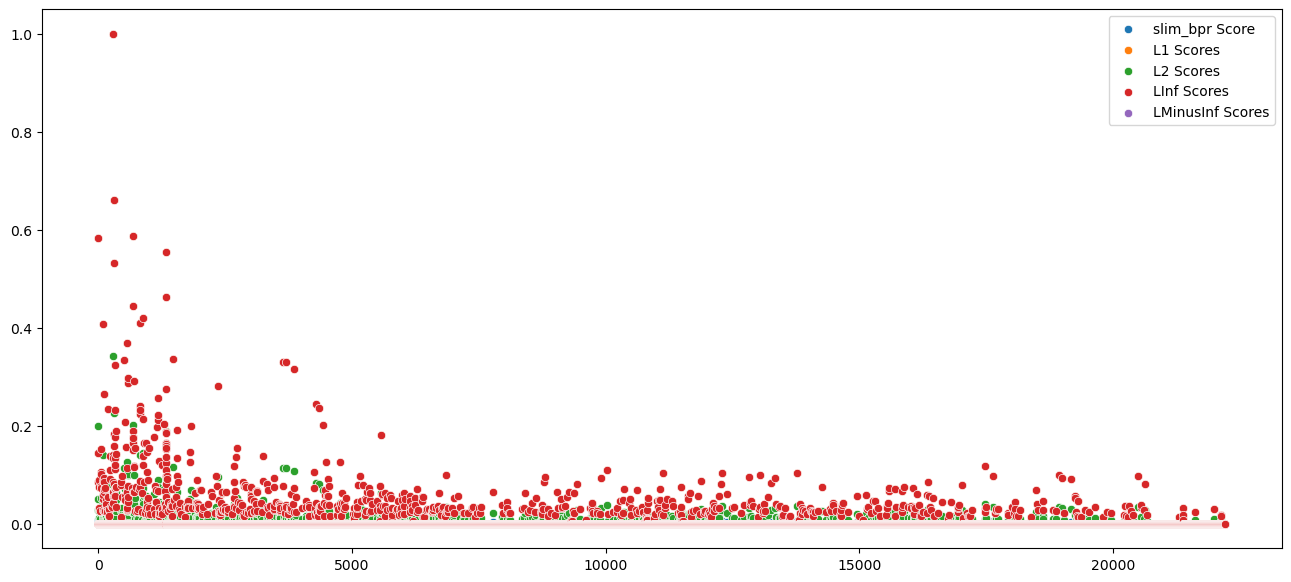

In [ ]:
import seaborn as sns
from numpy import linalg as LA
import matplotlib.pyplot as plt

l1_slim_bpr = LA.norm([slim_bpr_score], 1)
l1_slim_bpr_scores = slim_bpr_score / l1_slim_bpr

l2_slim_bpr = LA.norm([slim_bpr_score], 2)
l2_slim_bpr_scores = slim_bpr_score / l2_slim_bpr

linf_slim_bpr = LA.norm(slim_bpr_score, np.inf)
linf_slim_bpr_scores = slim_bpr_score / linf_slim_bpr

lminusinf_slim_bpr = LA.norm(slim_bpr_score, -np.inf)
lminusinf_slim_bpr_scores = slim_bpr_score / lminusinf_slim_bpr

print(slim_bpr_score, l1_slim_bpr, l2_slim_bpr, linf_slim_bpr, lminusinf_slim_bpr)

_ = plt.figure(figsize=(16,7))
ax = sns.scatterplot(data=slim_bpr_score)
ax = sns.scatterplot(data=l1_slim_bpr_scores) 
ax = sns.scatterplot(data=l2_slim_bpr_scores) 
ax = sns.scatterplot(data=linf_slim_bpr_scores) 
ax = sns.scatterplot(data=lminusinf_slim_bpr_scores) 
ax.legend(["slim_bpr Score", "L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

C:\Users\Francesco1\AppData\Local\Temp\ipykernel_2136\2849860516.py:11: RuntimeWarning: divide by zero encountered in divide
  lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta
C:\Users\Francesco1\AppData\Local\Temp\ipykernel_2136\2849860516.py:11: RuntimeWarning: invalid value encountered in divide
  lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta


[0.         0.07014223 0.         ... 0.         0.         0.        ] 9.687704789863075 0.6954575007088359 0.21120049212739458 0.0


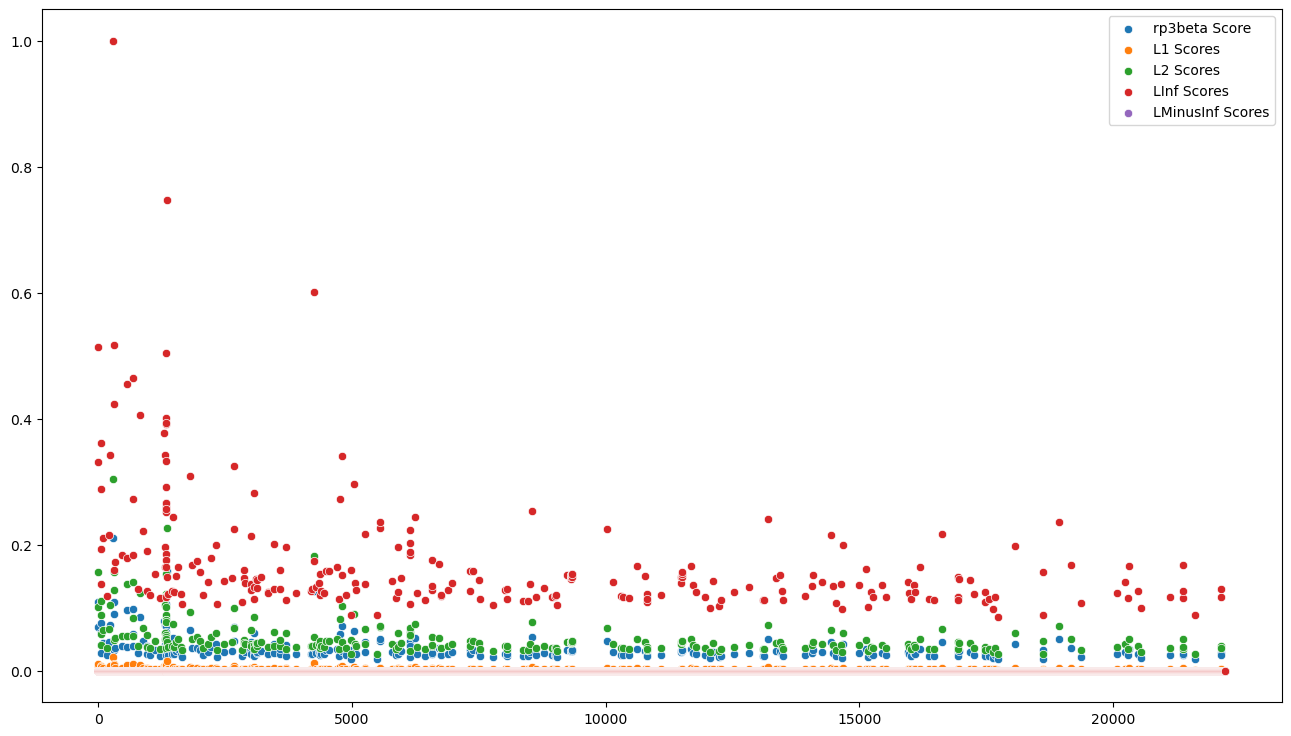

In [ ]:
l1_rp3beta = LA.norm(rp3beta_score, 1)
l1_rp3beta_scores = rp3beta_score / l1_rp3beta

l2_rp3beta = LA.norm(rp3beta_score, 2)
l2_rp3beta_scores = rp3beta_score / l2_rp3beta

linf_rp3beta = LA.norm(rp3beta_score, np.inf)
linf_rp3beta_scores = rp3beta_score / linf_rp3beta

lminusinf_rp3beta = LA.norm(rp3beta_score, -np.inf)
lminusinf_rp3beta_scores = rp3beta_score / lminusinf_rp3beta

print(rp3beta_score, l1_rp3beta, l2_rp3beta, linf_rp3beta, lminusinf_rp3beta)

_ = plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=rp3beta_score)
ax = sns.scatterplot(data=l1_rp3beta_scores) 
ax = sns.scatterplot(data=l2_rp3beta_scores) 
ax = sns.scatterplot(data=linf_rp3beta_scores) 
ax = sns.scatterplot(data=lminusinf_rp3beta_scores) 
ax.legend(["rp3beta Score", "L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

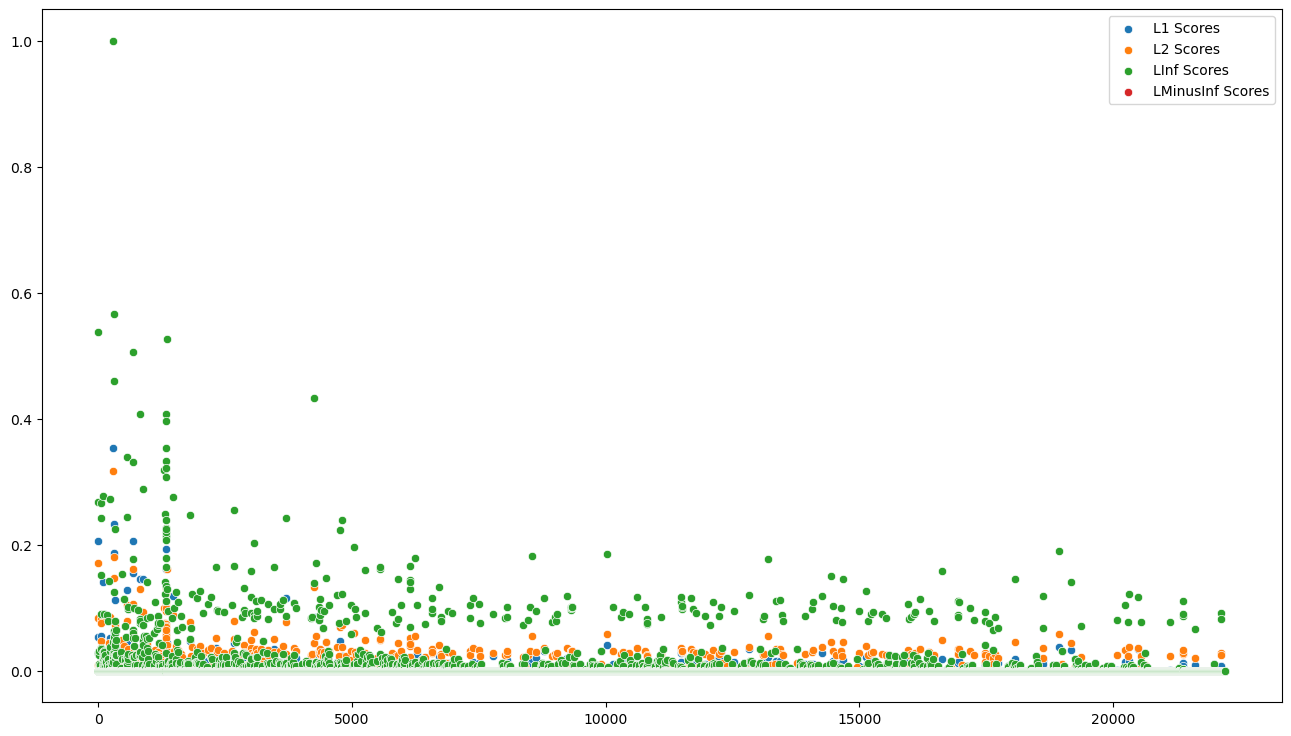

In [ ]:
lambda_weights = 0.66

l1_new_scores = lambda_weights * l1_rp3beta_scores + (1 - lambda_weights) * l1_slim_bpr_scores
l2_new_scores = lambda_weights * l2_rp3beta_scores + (1 - lambda_weights) * l2_slim_bpr_scores
linf_new_scores = lambda_weights * linf_rp3beta_scores + (1 - lambda_weights) * linf_slim_bpr_scores
lminusinf_new_scores = lambda_weights * lminusinf_rp3beta_scores + (1 - lambda_weights) * lminusinf_slim_bpr_scores

_ = plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=l1_new_scores)
ax = sns.scatterplot(data=l2_new_scores) 
ax = sns.scatterplot(data=linf_new_scores) 
ax = sns.scatterplot(data=lminusinf_new_scores) 
ax.legend(["L1 Scores", "L2 Scores", "LInf Scores", "LMinusInf Scores"])

In [ ]:
from Recommenders.BaseRecommender import BaseRecommender
import scipy.sparse as sps

class DifferentLossScoresHybridRecommender(BaseRecommender):
    """ ScoresHybridRecommender
    Hybrid of two prediction scores R = R1/norm*alpha + R2/norm*(1-alpha) where R1 and R2 come from
    algorithms trained on different loss functions.

    """

    RECOMMENDER_NAME = "DifferentLossScoresHybridRecommender"


    def __init__(self, URM_train, recommender_1, recommender_2):
        super(DifferentLossScoresHybridRecommender, self).__init__(URM_train)

        self.URM_train = sps.csr_matrix(URM_train)
        self.recommender_1 = recommender_1
        self.recommender_2 = recommender_2
        
        
        
    def fit(self, norm, alpha = 0.5):

        self.alpha = alpha
        self.norm = norm


    def _compute_item_score(self, user_id_array, items_to_compute):
        
        item_weights_1 = self.recommender_1._compute_item_score(user_id_array)
        item_weights_2 = self.recommender_2._compute_item_score(user_id_array)

        norm_item_weights_1 = LA.norm(item_weights_1, self.norm)
        norm_item_weights_2 = LA.norm(item_weights_2, self.norm)
        
        
        if norm_item_weights_1 == 0:
            norm_item_weights_1 = 0.0000001
            #raise ValueError("Norm {} of item weights for recommender 1 is zero. Avoiding division by zero".format(self.norm))
        
        if norm_item_weights_2 == 0:
            norm_item_weights_2 = 0.0000001
            #raise ValueError("Norm {} of item weights for recommender 2 is zero. Avoiding division by zero".format(self.norm))
        
        item_weights = item_weights_1 / norm_item_weights_1 * self.alpha + item_weights_2 / norm_item_weights_2 * (1-self.alpha)

        return item_weights



In [ ]:
def objective(trial):
    norm = trial.suggest_categorical("norm", [1, 2, np.inf, -np.inf])

    recommender_object = DifferentLossScoresHybridRecommender(data_train, slim_bpr_recommender, rp3beta_recommender)
    recommender_object.fit(
        norm = norm, 
        alpha = 0.66)

    _, _, ev_map, _, _ = evaluator(recommender_object, data_train, data_val)
    
    return ev_map

for norm in [1, 2, np.inf, -np.inf]:
    rat_rank_study.optimize(objective, n_trials=1)

DifferentLossScoresHybridRecommender: URM Detected 212 ( 1.7%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 113 ( 0.5%) items with no interactions.


[I 2024-01-06 16:08:53,713] Trial 4 finished with value: 0.07789120964205212 and parameters: {'norm': inf}. Best is trial 3 with value: 0.07789120964205212.


DifferentLossScoresHybridRecommender: URM Detected 212 ( 1.7%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 113 ( 0.5%) items with no interactions.


[I 2024-01-06 16:09:04,923] Trial 5 finished with value: 0.07789120964205212 and parameters: {'norm': inf}. Best is trial 3 with value: 0.07789120964205212.


DifferentLossScoresHybridRecommender: URM Detected 212 ( 1.7%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 113 ( 0.5%) items with no interactions.


[I 2024-01-06 16:09:16,180] Trial 6 finished with value: 0.07789120964205212 and parameters: {'norm': inf}. Best is trial 3 with value: 0.07789120964205212.


DifferentLossScoresHybridRecommender: URM Detected 212 ( 1.7%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 113 ( 0.5%) items with no interactions.


[I 2024-01-06 16:09:27,100] Trial 7 finished with value: 0.07789120964205212 and parameters: {'norm': -inf}. Best is trial 3 with value: 0.07789120964205212.


In [ ]:
#def objective(trial):
#    norm = trial.suggest_categorical("norm", [1, 2, np.inf, -np.inf])
#
#    recommender_object = DifferentLossScoresHybridRecommender(data_train, slim_bpr_recommender, rp3beta_recommender)
#    recommender_object.fit(
#        norm = norm, 
#        alpha = 0.66)
#
#    _, _, ev_map, _, _ = evaluator(recommender_object, data_train, data_val)
#    
#    return ev_map
#
#rat_rank_study.optimize(objective, n_trials=150)

In [ ]:
rat_rank_study.best_params

{'norm': inf}

In [ ]:
recommender_object = DifferentLossScoresHybridRecommender(data_train, slim_bpr_recommender, rp3beta_recommender)
recommender_object.fit(**rat_rank_study.best_params)

DifferentLossScoresHybridRecommender: URM Detected 212 ( 1.7%) users with no interactions.
DifferentLossScoresHybridRecommender: URM Detected 113 ( 0.5%) items with no interactions.


In [ ]:
submission2(recommender_object, users, usermap, itemmap, data_train)

TopPopRecommender: URM Detected 212 ( 1.7%) users with no interactions.
TopPopRecommender: URM Detected 113 ( 0.5%) items with no interactions.
